# Synthetic vs. real data comparison

In [1]:
import numpy as np
import jax.numpy as jnp
import jax


from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.pyplot as plt
from circuitmap import NeuralDemixer

import sys
sys.path.append('../')
import grid_utils as util
import subtract_utils as subtract_utils
import os
import glob
import pc_subtractr_network
import jax.random as jrand
import photocurrent_sim
import h5py

plt.rcParams['figure.dpi'] = 300

In [2]:
key = jrand.PRNGKey(0)

pc_shape_params = dict(
    O_inf_min=0.3,
    O_inf_max=1.0,
    R_inf_min=0.3,
    R_inf_max=1.0,
    tau_o_min=5,
    tau_o_max=14,
    tau_r_min=25,
    tau_r_max=30,
)

(prev_shapes, curr_shapes, next_shapes) = photocurrent_sim.sample_photocurrent_shapes(
    key, 50,
    pc_shape_params=pc_shape_params,
)

In [3]:
data_path = '../data/masato/B6WT_AAV_hsyn_chrome2f_gcamp8/preprocessed/220308_B6_Chrome2fGC8_030822_Cell2_OpsPositive_A_grid_cmReformat.mat'

with h5py.File(data_path) as f:
    pscs = np.array(f['pscs']).T
    stim_mat = np.array(f['stimulus_matrix']).T
    targets = np.array(f['targets']).T
    powers = np.max(stim_mat, axis=0)
    # npulses = np.array(f['num_pulses_per_holo'], dtype=int).item()

In [4]:

demixer_checkpoint = '../../circuit_mapping/demixers/nwd_ee_ChroME1.ckpt'
results = subtract_utils.run_subtraction_pipeline(
    pscs, powers, targets, stim_mat, demixer_checkpoint, no_op=True,
)

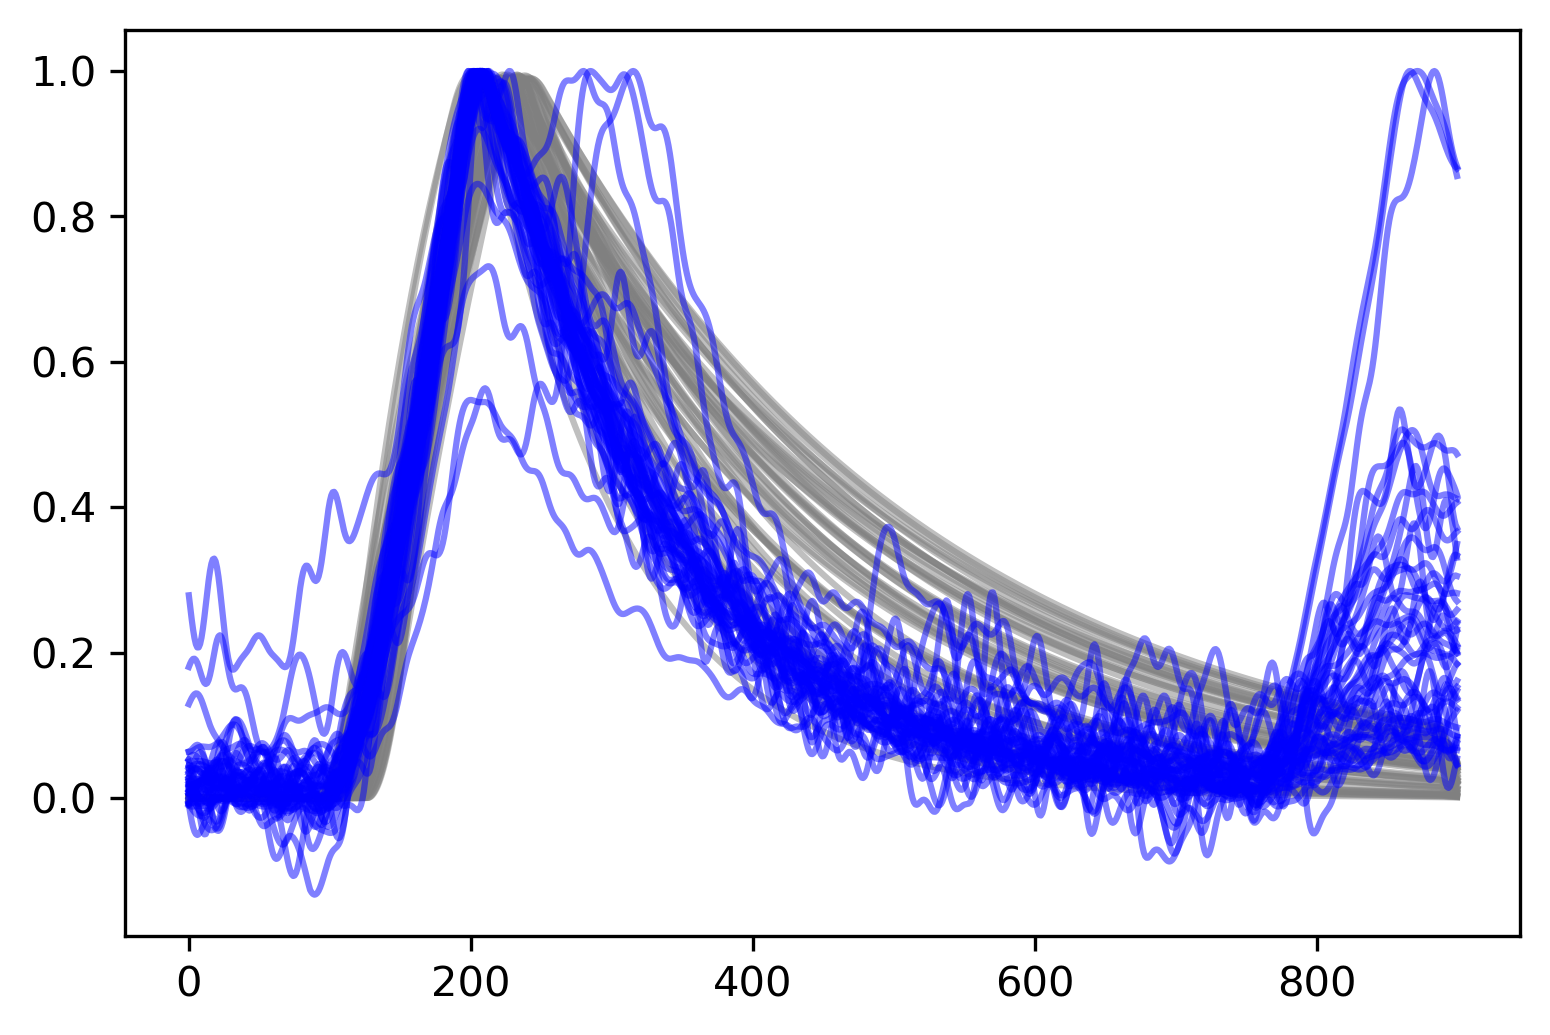

In [5]:
fig, axs = plt.subplots(nrows=1, ncols=1)
traces = results['raw_tensor'][:, 13, 13, 3,:].reshape(-1, 900)
traces /= np.max(traces, axis=-1, keepdims=True)
axs.plot(curr_shapes.T, color='gray', alpha=0.5)
axs.plot(traces.T, color='blue', alpha=0.5)
plt.show()